# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Use shape attribute to check how many rows and columns are present in the data
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Out of the 9 columns, we have 1 float type column (cost_of_the_order),  
4 integer type columns (order_id, customer_id, food_preparation_time, and delivery_time),  
and 4 object type columns (restaurant_name, cuisine_type, day_of_the_week, and rating).

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Use isnull().sum() to check missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
The function `.isnull` checks whether the data is missing in each column. The function `sum()` sums the number of 'True' values in the column.  
We can conclude here that there aren't any missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Use .describe function to check the statistical summary of numerical values
df["food_preparation_time"].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
The minimum time taken for food to be prepared once an order is placed is 20 minutes,  
the maximum time taken for food to be prepared once an order is placed is 35 minutes,  
the average time taken is 27 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# Use value_counts to find out the counts of different values in a specific column
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
Out of the 1898 orders, 736 orders are not rated, which is around 38.8% of the total orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Order ID

In [8]:
## Order Id
df['order_id'].nunique()  

1898

#### Observations:  
Order Ids are all unique identifiers.

### Customer ID

In [9]:
## Customer ID
## Check if they are all unique
df['customer_id'].nunique() 

1200

In [10]:
## Use value_counts twice to see how many customers ordered once / twice/ etc.
customer_id_count = df['customer_id'].value_counts(sort = True).value_counts().rename_axis('Customers with X times of orders').reset_index(name='No. of customers')
customer_id_count.sort_values(['Customers with X times of orders', 'No. of customers'],
              ascending = [True, False])

,Customers with X times of orders,No. of customers
0,1,784
1,2,267
2,3,83
3,4,33
4,5,19
5,6,6
6,7,4
10,8,1
9,9,1
8,10,1


#### Observations:  
For customer ID, it's not always unique. There are customers who ordered more than once.  
Actually we have 267 customers who ordered twice, 83 customers who ordered three times, 33 customers four times, etc.

### Restaurant name

In [11]:
## Restaurant Name
## Check if they are all unique
df['restaurant_name'].nunique() 

178

In [12]:
## Use value_counts twice to see restaurants with one / two / three / etc. orders
restaurant_count = df['restaurant_name'].value_counts(sort = True).value_counts().rename_axis('Restaurants with X times of orders').reset_index(name='No. of restaurants')
restaurant_count.sort_values(['Restaurants with X times of orders', 'No. of restaurants'],
              ascending = [True, False])

,Restaurants with X times of orders,No. of restaurants
0,1,50
1,2,23
2,3,23
3,4,13
4,5,11
5,6,6
6,7,6
18,8,1
8,9,4
19,10,1


#### Observations:  
There are 178 restuarants in total.  
50 of them have 1 order in the data set. There is one restaurant with 219 orders, which is a very surprising record.

### Cuisine Type

In [13]:
## Cuisine types
df['cuisine_type'].nunique()

14

In [14]:
## Use value_counts to see the orders for each cuisine
df['cuisine_type'].value_counts(sort = True).rename_axis('Cuisine Type').reset_index(name='No. of orders')

,Cuisine Type,No. of orders
0,American,584
1,Japanese,470
2,Italian,298
3,Chinese,215
4,Mexican,77
5,Indian,73
6,Middle Eastern,49
7,Mediterranean,46
8,Thai,19
9,French,18


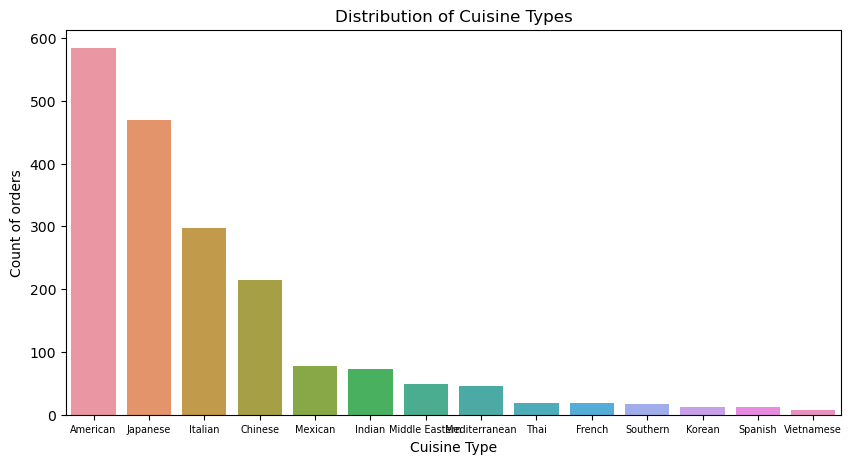

In [15]:
plt.figure(figsize = (10,5))

sns.countplot(data = df, x = 'cuisine_type', order = df['cuisine_type'].value_counts().index)
plt.title('Distribution of Cuisine Types')
plt.xticks(fontsize = 7)
plt.xlabel('Cuisine Type')
plt.ylabel('Count of orders')
plt.show()

#### Observations:  
There are 14 cuisine types in the dataset.  
American food are most frequently ordered, with 584 orders in total.  
Followed by Japanese food, which are ordered 470 times.  
Some cuisine types like Spanish and Vietnamese food are not very frequently ordered.

### Cost of the order

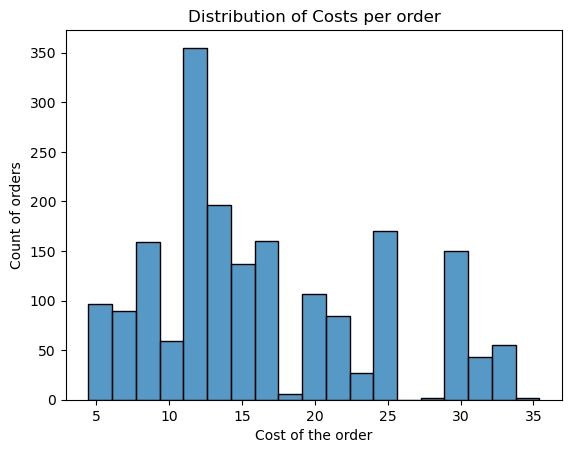

In [16]:
# Histogram
sns.histplot(data=df,x='cost_of_the_order') 
plt.title('Distribution of Costs per order')
plt.xlabel('Cost of the order')
plt.ylabel('Count of orders')
plt.show()

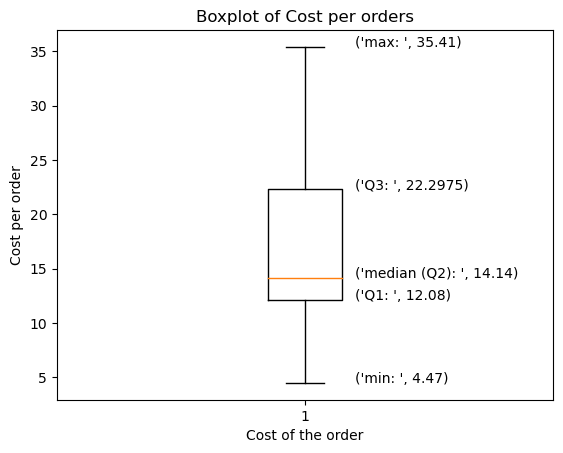

In [17]:
# Boxplot
plt.boxplot(df['cost_of_the_order'])
plt.text(x = 1.1, y = df['cost_of_the_order'].min(), s =('min: ', df['cost_of_the_order'].min()))
plt.text(x = 1.1, y = df['cost_of_the_order'].quantile(0.25), s =('Q1: ', df['cost_of_the_order'].quantile(0.25)))
plt.text(x = 1.1, y = df['cost_of_the_order'].median(), s =('median (Q2): ', df['cost_of_the_order'].median()))
plt.text(x = 1.1, y = df['cost_of_the_order'].quantile(0.75), s =('Q3: ', df['cost_of_the_order'].quantile(0.75)))
plt.text(x = 1.1, y = df['cost_of_the_order'].max(), s =('max: ', df['cost_of_the_order'].max()))

plt.title('Boxplot of Cost per orders')
plt.xlabel('Cost of the order')
plt.ylabel('Cost per order')
plt.show()

#### Observations:  
Cost of the order ranges from \\$4.47 to \\$35.41.  
Median is \\$14.14 and most orders are \\$10-\\$15.  
The distribution is slightly right skewed (mean is greater than median), i.e. fewer expensive orders, but they drove the mean to a higher value.

### Day of the week

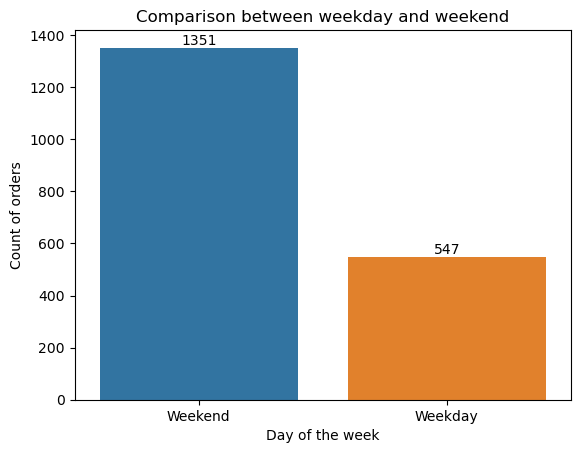

In [18]:
# Use countplot to show counts of weekday and weekend orders
ax = sns.countplot(data = df, x = 'day_of_the_week')
plt.title('Comparison between weekday and weekend')
plt.xlabel('Day of the week')
plt.ylabel('Count of orders')
values = df['day_of_the_week'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=values)
plt.show()

#### Observations:  
There are more orders over the weekend compared with weekdays (1351 orders versus 547 orders).

### Rating

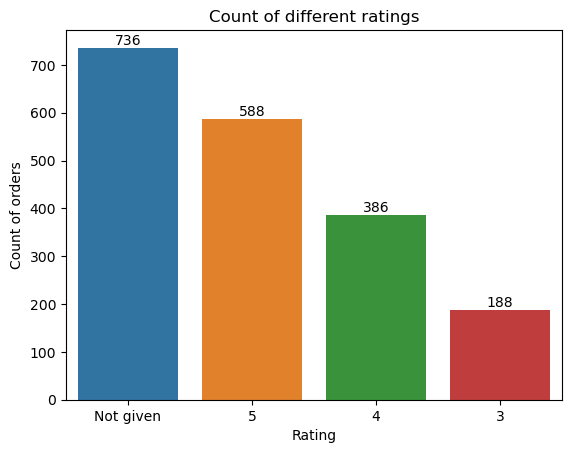

In [19]:
# Use countplot to show counts of ratings
ax = sns.countplot(data = df, x = 'rating', order=df['rating'].value_counts(ascending=False).index)
plt.title('Count of different ratings')
plt.xlabel('Rating')
plt.ylabel('Count of orders')
values = df['rating'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=values)
plt.show()

#### Observations:  
736 orders have no ratings given.  
588 orders get 5 points out of 5, 386 orders get 4 points and 188 orders get 3 points.

### Food preparation time

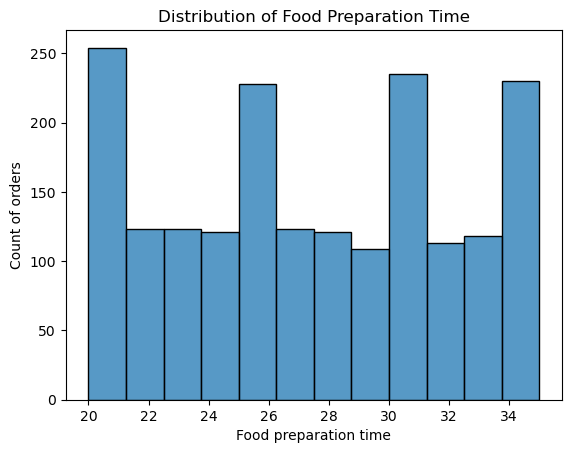

In [20]:
# Histogram
sns.histplot(data=df,x='food_preparation_time') 
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food preparation time')
plt.ylabel('Count of orders')
plt.show()

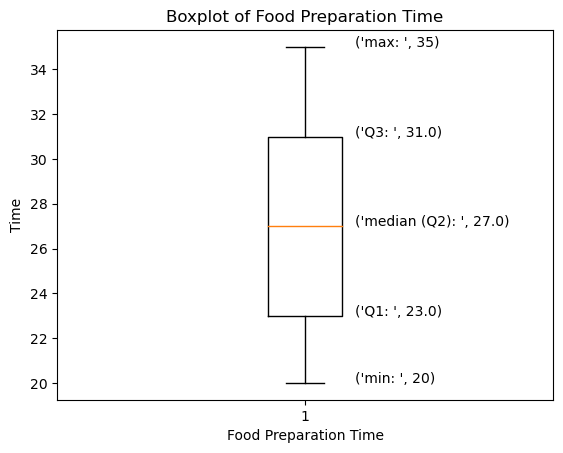

In [21]:
# Boxplot
plt.boxplot(df['food_preparation_time'])
plt.text(x = 1.1, y = df['food_preparation_time'].min(), s =('min: ', df['food_preparation_time'].min()))
plt.text(x = 1.1, y = df['food_preparation_time'].quantile(0.25), s =('Q1: ', df['food_preparation_time'].quantile(0.25)))
plt.text(x = 1.1, y = df['food_preparation_time'].median(), s =('median (Q2): ', df['food_preparation_time'].median()))
plt.text(x = 1.1, y = df['food_preparation_time'].quantile(0.75), s =('Q3: ', df['food_preparation_time'].quantile(0.75)))
plt.text(x = 1.1, y = df['food_preparation_time'].max(), s =('max: ', df['food_preparation_time'].max()))

plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Time')
plt.show()

#### Observations:  
Food Preparation time ranges from 20 minutes to 35 minutes.  
And it is quite normally distributed, with median of 27 minutes and no outliers.

### Delivery Time

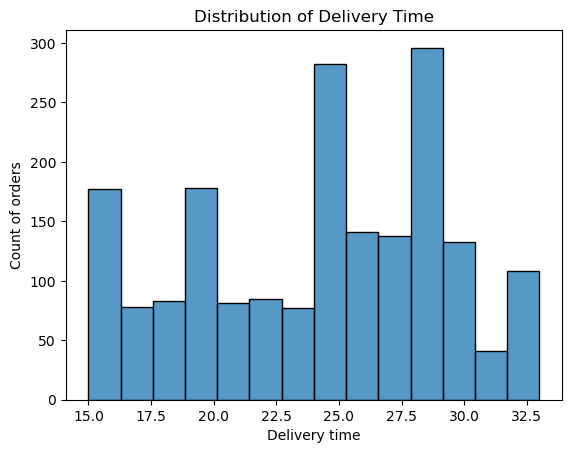

In [22]:
# Histogram
sns.histplot(data=df,x='delivery_time') 
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery time')
plt.ylabel('Count of orders')
plt.show()

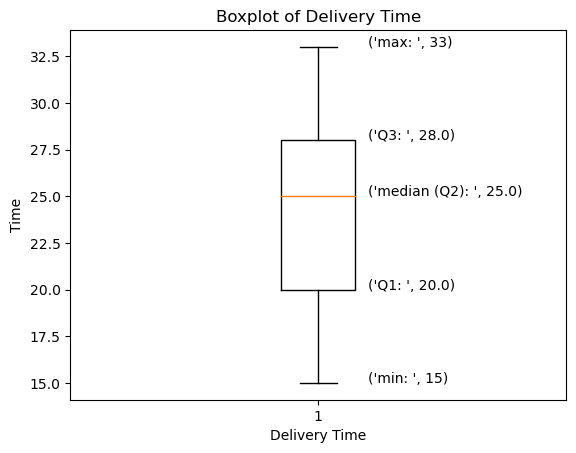

In [23]:
# Boxplot
plt.boxplot(df['delivery_time'])
plt.text(x = 1.1, y = df['delivery_time'].min(), s =('min: ', df['delivery_time'].min()))
plt.text(x = 1.1, y = df['delivery_time'].quantile(0.25), s =('Q1: ', df['delivery_time'].quantile(0.25)))
plt.text(x = 1.1, y = df['delivery_time'].median(), s =('median (Q2): ', df['delivery_time'].median()))
plt.text(x = 1.1, y = df['delivery_time'].quantile(0.75), s =('Q3: ', df['delivery_time'].quantile(0.75)))
plt.text(x = 1.1, y = df['delivery_time'].max(), s =('max: ', df['delivery_time'].max()))

plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Time')
plt.show()

#### Observations:  
The delivery time ranges from 15 minutes to 33 minutes.
It is slightly left skewed (median is greater than mean), with median as 25 minutes.  
We have the most common delivery time at around 25 minutes and 28 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [24]:
df['restaurant_name'].value_counts(sort = True).head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue RIbbon Fried Chicken and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [25]:
# Firstly get the sub dataframe of weekend orders
# Then count the values of each cuisine type in the weekend orders
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().rename_axis('Cuisine Type').reset_index(name='No. of orders')

,Cuisine Type,No. of orders
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53
5,Indian,49
6,Mediterranean,32
7,Middle Eastern,32
8,Thai,15
9,French,13


#### Observations:
American food is the most popular cuisine on weekends, with 415 orders in total.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [26]:
# Firstly get the sub dataframe of orders that cost more than 20 dollars
df_more_than_20 = df[df['cost_of_the_order']>20]

print('The number of orders that cost more than 20 dollars is:', df_more_than_20.shape[0])

# Then calculate the percentage
percentage = (df_more_than_20.shape[0] / df.shape[0]) * 100

print('Percentage of orders that cost more than 20 dollars is: ', round(percentage, 2), '%')

The number of orders that cost more than 20 dollars is: 555
Percentage of orders that cost more than 20 dollars is:  29.24 %


#### Observations:
There are 29.24% of the total orders (555 orders) that cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [27]:
# Get the mean delivery time
round(df['delivery_time'].mean(), 2)

24.16

#### Observations:
The mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
# Find the top 3 customer IDs
df['customer_id'].value_counts().head(3).rename_axis('Customer ID').reset_index(name='No. of orders')

,Customer ID,No. of orders
0,52832,13
1,47440,10
2,83287,9


#### Observations:
The top 3 customers are ID 52832 (13 orders), ID 47440 (10 orders) and ID 83287 (9 orders).

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


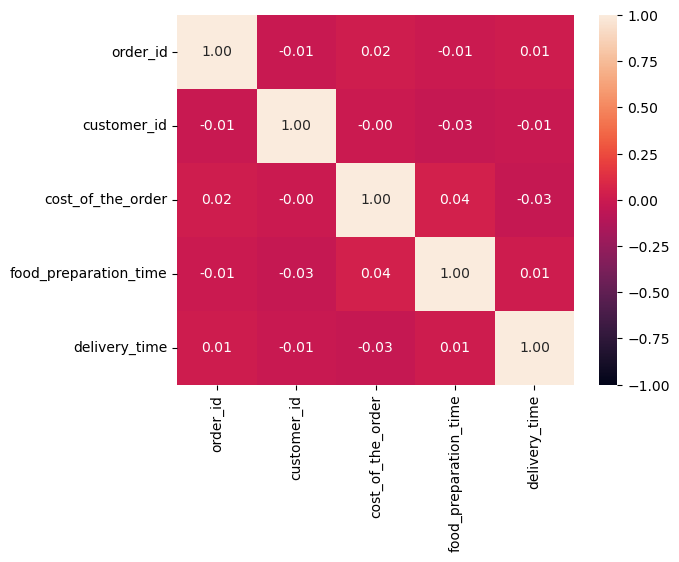

In [29]:
# Firstly check the correlation among variables using heatmap
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

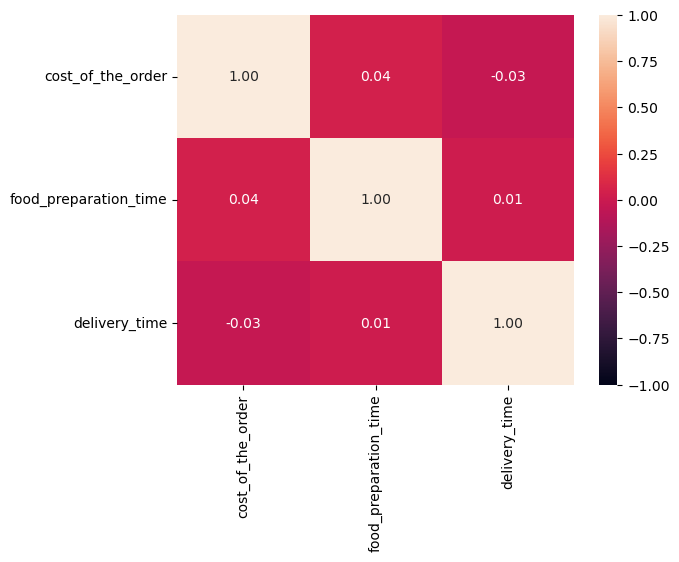

In [30]:
# It may be helpful to only check the numerical variables
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.heatmap(df[num_var].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

#### Observations:  
There are no obvious correlations among these three numerical variables.  
Therefore, the cost of order is not quite correlated to neither food preparation time, nor delivery time.

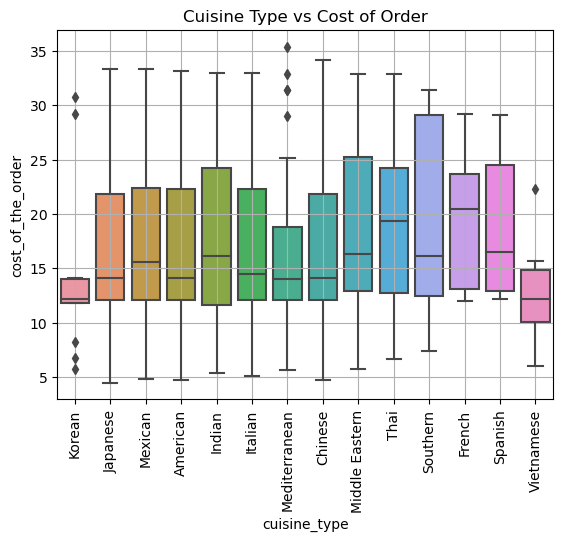

In [31]:
# Let's now check some correlations between categorical and numerical variables
# Firstly, let's check cuisine type and cost
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.grid(True)
plt.xticks(rotation = 90)
plt.title("Cuisine Type vs Cost of Order")
plt.show()

#### Observations:  
As we learnt from the univariate analysis that American, Japanese and Italian food are the most popular ones. I think the cost is a relevant factor as well, as they tend to have a fairly reasonable price without outliers.  
Customers can easily get a decent meal by spending an average of 15 - 20 dollars.  
Whereas Korean or Mediterranean food may only be ordered when customers really want an occasional treat.

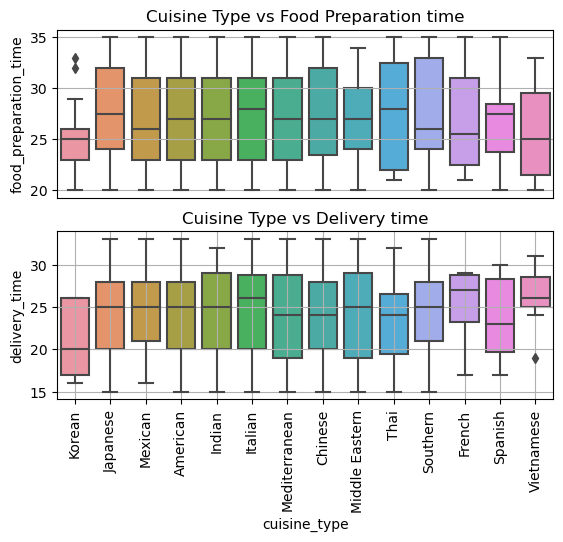

In [32]:
# Then, let's check the correlation between cuisine type and delivery time and food preparation time

plt.subplot(2, 1, 1)
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.grid(True)
plt.xticks([])
plt.xlabel("")
plt.title("Cuisine Type vs Food Preparation time")

plt.subplot(2, 1, 2)
sns.boxplot(x = "cuisine_type", y = "delivery_time", data = df)
plt.grid(True)
plt.xticks(rotation = 90)
plt.title("Cuisine Type vs Delivery time")

plt.show()

#### Observations:  
The cuisine type doesn't seem to have much correlation with the Food prepration time or the delivery time. Most orders have a relevantly large range of preparation time and delivery time across each cuisine type.  
Cuisine types liek Korean and Vietnamese have some outliers maybe because their order samples are too small, with only several orders, it's hard to draw some conclusions from it.

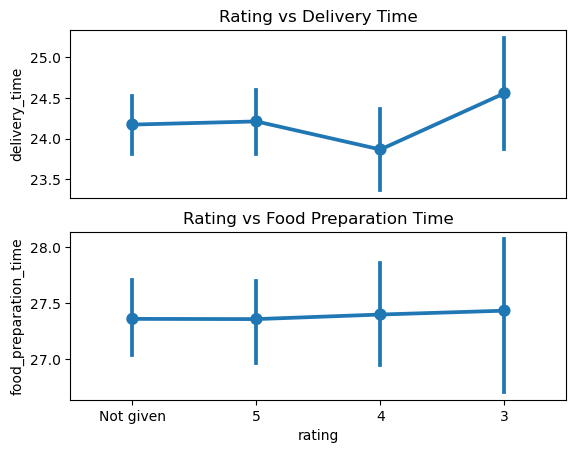

In [33]:
# Let's now check some correlations against ratings.

# Rating versus Delivery time and Food Preparation time

plt.subplot(2, 1, 1)
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, order=["Not given", "5", "4", "3"])
plt.xticks([])
plt.xlabel("")
plt.title("Rating vs Delivery Time")

plt.subplot(2, 1, 2)
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df, order=["Not given", "5", "4", "3"])
plt.title("Rating vs Food Preparation Time")
plt.show()

#### Observations:  
It seems that Food preparation time doesn't affect much of the rating - which makes sense, as the customers don't really care how it takes for the food to be prepared.  
But long delivery time does affect the rating, as for rating = 3, the average delivery time is definitely higher.

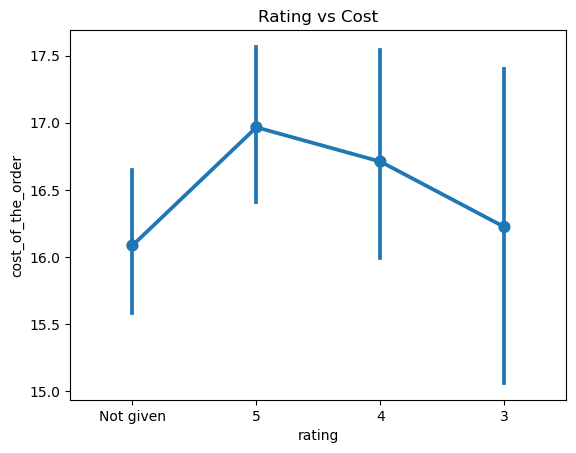

In [34]:
# Rating versus Cost

sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df, order=["Not given", "5", "4", "3"])
plt.title("Rating vs Cost")
plt.show()

#### Observations:  
It is interesting to see that the orders with higher costs tend to have better ratings, which seems to be a positive feedback to show that the food is cost-worthy and customers are satisfied with the food they paid higher for.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [35]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

In [36]:
# Dataframe with rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index(name = 'Count')
df_rating_count.head() 

,restaurant_name,Count
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [37]:
# Get the data of restaurants that have rating count more than 50
df_more_than_50 = df_rated[df_rated['restaurant_name'].isin(df_rating_count[df_rating_count['Count'] > 50]['restaurant_name'])].copy()

In [38]:
# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_more_than_50.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
We find 4 restaurants with the rating count over 50 and all of their average ratings are greater than 4.  
Therefore they are all eligible for the promotion offer.  
They are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [39]:
def revenue(x):
    if x > 20:
        return round(x * 0.25, 2)
    elif x > 5:
        return round(x * 0.15, 2)
    else:
        return 0

df['Revenue'] = df['cost_of_the_order'].apply(revenue)

In [40]:
total = df['Revenue'].sum()
print('The net revenue is', round(total, 2), 'dollars')

The net revenue is 6166.5 dollars


#### Observations:
The net revenue across all orders is \\$6166.5.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [41]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

In [42]:
long_time_order = df[df['total_time']>60]

In [43]:
percentage = (long_time_order.shape[0] / df.shape[0]) * 100
print('Percentage of orders that take more than 60 minutes is: ', round(percentage, 2), '%')

Percentage of orders that take more than 60 minutes is:  10.54 %


#### Observations:
10.64% of the orders take more than 60 minutes to be delivered from the time the order is placed (preparation time plus delivery time).

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [44]:
print('The mean delivery time on weekdays is', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean(), 2),
     'minutes')

print('The mean delivery time on weekends', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean(), 2),
     'minutes')

The mean delivery time on weekdays is 28.34 minutes
The mean delivery time on weekends 22.47 minutes


#### Observations:
The delivery time tends to take longer over weekdays (which makes sense due to peak hours).  
The mean delivery time on weekdays is 28.34 minutes, while the mean delivery time on weekends is 22.47 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  We can tell from the analysis that American cuisine and Japanese cuisine are the most popular cuisines. Restaurants like Shake Shack and The Meatball Shop are the top star restaurants on people's order lists.
*  We can also tell that there are more people make orders during weekends compared with weekdays, maybe because people tend to treat themselves more over weekends, maybe also because the delivery time is often longer during weekdays.
*  Although a lot of ratings are 5 out of 5, more customers tend not to give any ratings, which is not helpful for the business to understand how they have done.
*  Over half of the customers only make 1 order (784 out of 1200), which is not great to make the business model sustainable.

### Recommendations:

*  As we figured out that American and Japanese cuisines are the most popular ones, we can increase the number of restaurants offering these cuisines. It is also helpful to promote the popular restaurants to boost sales.
*  Weekdays tend to have fewer sales, so it is recommended to launch some promotions on weekdays to attact customers. It is also helpful to improve the delivery time on weekdays to prevent frustrations from the customers (but it might be difficult as the peak hours are inevitable).
*  We should provide some incentives to attract customers to rate, such as a 5% voucher for next time use if a rating is provided. The rating interface can also be designed more user friendly and less time-consuming to attract customers to rate.
*  We should track the user behaviour after their first order. If no other orders are made after the first order in, let's say, one-week time, we can send promotion emails to the customer to attract them for new orders.
*  Some general recommendations would also be helpful, like launching a referral scheme to expand the customer networks, or launching reward schemes - if a customer makes 3 or 4 orders in a roll within one week or so, they can get an extra reward for their next time order. 

---